In [1]:
#https://www.kaggle.com/datasets/stealthtechnologies/predict-student-performance-dataset

In [2]:
#Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from utils import checkoutlier, check_mv, check_dp, checkcor, splitting, model_RF, model_RF_HP
from Config import config
from mlflow.models import infer_signature

In [3]:
data = pd.read_csv(r'C:\Users\ASUS\ProjectPreNewYears\Assets\Dataset\data.csv') #Import data using pandas
data.head() #Showing Top 5 Data

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [5]:
data.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


# Data Cleaning

In [6]:
check_dp(data) #Checking Duplikat Data

Jumlah Duplikat Data:  0


In [7]:
check_mv(data) #Checking MV

Jumlah Missing Value:  Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64


<Axes: ylabel='Socioeconomic Score'>

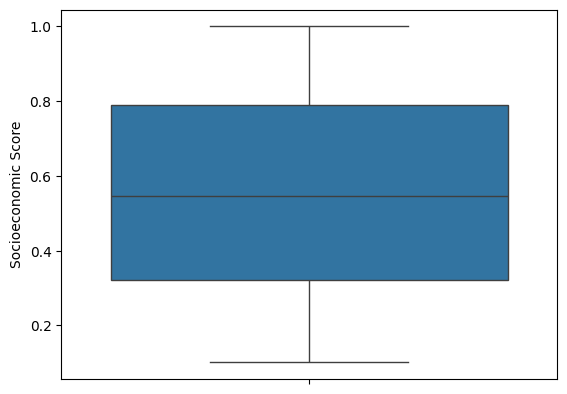

In [8]:
sns.boxplot(data, y='Socioeconomic Score')

<Axes: ylabel='Study Hours'>

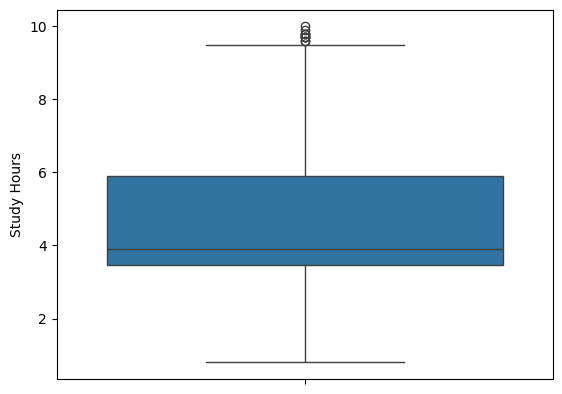

In [9]:
sns.boxplot(data, y='Study Hours')

<Axes: ylabel='Sleep Hours'>

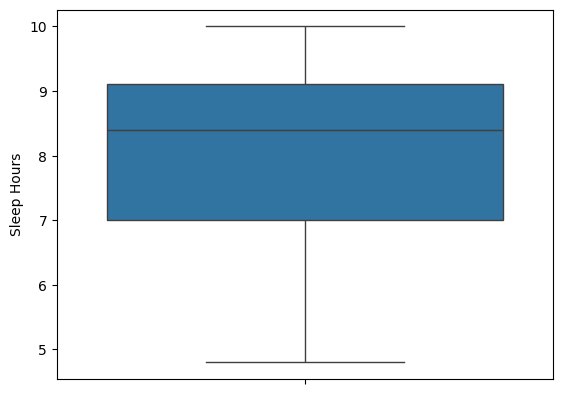

In [10]:
sns.boxplot(data, y='Sleep Hours')

<Axes: ylabel='Attendance (%)'>

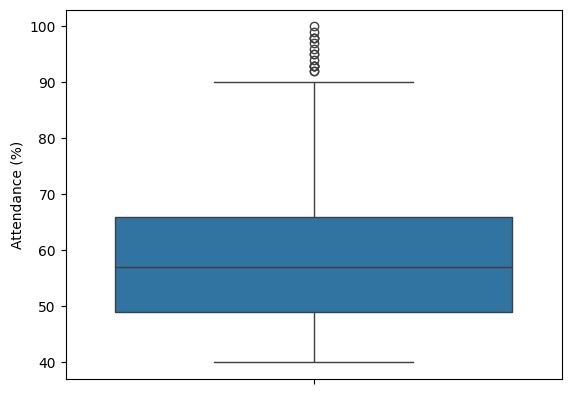

In [11]:
sns.boxplot(data, y='Attendance (%)')

<Axes: ylabel='Grades'>

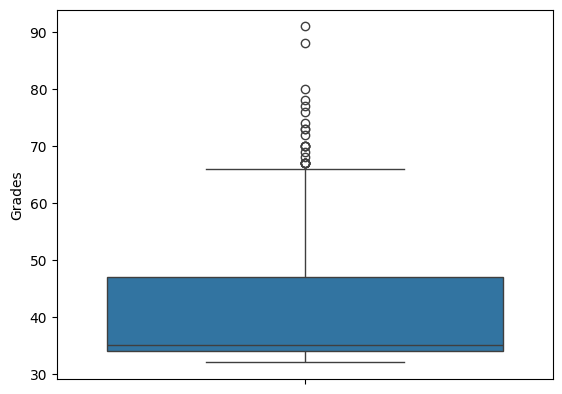

In [12]:
sns.boxplot(data, y='Grades')

```
Terdapat Outlier pada variable Study Hours, Attendace, dan Grades

```

In [13]:
bersih = checkoutlier(data, 'Study Hours')

Jumlah Outlier dalam kolom {kolom}=        Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
11                0.34816          9.1          7.7            80.0    60.0
22                0.66286          9.8          6.2            78.0    64.0
37                0.99789          9.5          7.1            41.0    88.0
43                0.74132          8.4          7.5            80.0    58.0
49                0.56987          9.0          7.3            74.0    61.0
...                   ...          ...          ...             ...     ...
1307              0.56168          8.9          7.0            86.0    59.0
1347              0.79212          0.9          8.3            50.0    33.0
1354              0.14612          8.8          7.6            93.0    59.0
1360              0.26702          0.8          8.3            49.0    33.0
1362              0.33208          1.0          7.9            57.0    35.0

[77 rows x 5 columns]


<Axes: ylabel='Study Hours'>

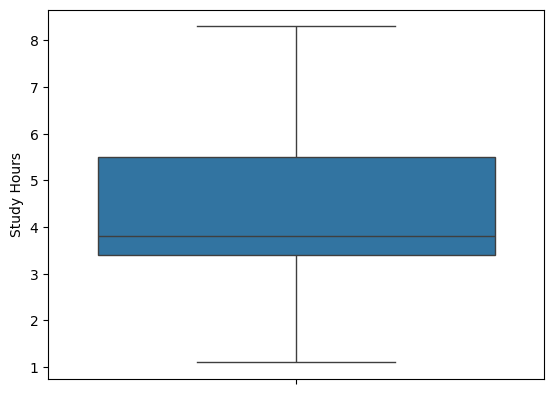

In [14]:
sns.boxplot(bersih, y='Study Hours')

In [15]:
bersih = checkoutlier(bersih, 'Attendance (%)')

Jumlah Outlier dalam kolom {kolom}=        Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
73                0.94990          8.1          8.5            84.0    70.0
95                0.55376          7.4          8.2            82.0    50.0
135               0.31144          6.0          8.7            82.0    42.0
146               0.18535          7.7          8.8            83.0    52.0
168               0.46406          5.5          8.2            83.0    41.0
195               0.96483          3.9          7.1            84.0    47.0
275               0.36190          4.2          8.2            83.0    34.0
351               0.14741          8.2          6.1            90.0    54.0
352               0.90023          8.0          5.5            84.0    59.0
388               0.52521          8.3          6.2            83.0    56.0
412               0.69492          8.2          8.5            83.0    58.0
442               0.38371          3.6          7.9

In [16]:
bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1277 non-null   float64
 1   Study Hours          1277 non-null   float64
 2   Sleep Hours          1277 non-null   float64
 3   Attendance (%)       1277 non-null   float64
 4   Grades               1277 non-null   float64
dtypes: float64(5)
memory usage: 59.9 KB


<Axes: ylabel='Attendance (%)'>

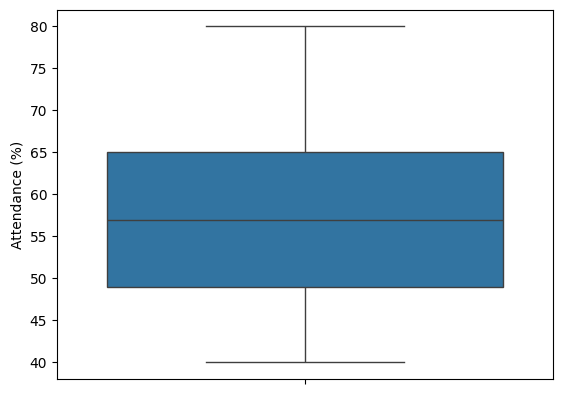

In [17]:
sns.boxplot(bersih, y='Attendance (%)')

In [18]:
data_bersih = checkoutlier(bersih, 'Grades')

Jumlah Outlier dalam kolom {kolom}=        Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
63                0.99555          5.7          7.9            78.0    66.0
65                0.89689          6.2          8.2            46.0    57.0
105               0.86498          8.3          8.2            59.0    64.0
110               0.84244          6.6          8.5            51.0    57.0
132               0.93925          6.0          9.8            51.0    60.0
134               0.97759          5.0          8.3            75.0    57.0
155               0.87604          6.2          9.9            47.0    57.0
182               0.93454          6.6          9.1            57.0    62.0
183               0.93871          6.3         10.0            61.0    62.0
191               0.89883          7.7          8.3            64.0    63.0
224               0.86746          6.5          8.8            40.0    59.0
233               0.75988          7.6          8.6

In [19]:
data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1217 non-null   float64
 1   Study Hours          1217 non-null   float64
 2   Sleep Hours          1217 non-null   float64
 3   Attendance (%)       1217 non-null   float64
 4   Grades               1217 non-null   float64
dtypes: float64(5)
memory usage: 57.0 KB


<Axes: ylabel='Grades'>

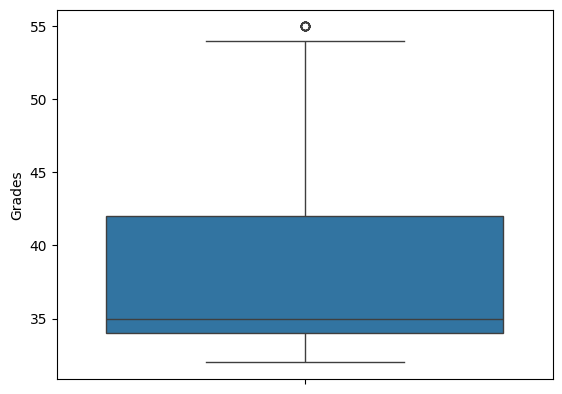

In [20]:
sns.boxplot(data_bersih, y='Grades')

# EDA

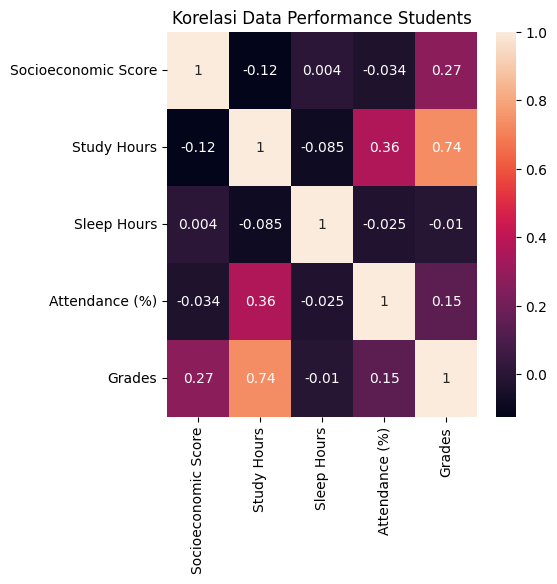

In [21]:
checkcor(data_bersih) #Checking Correlations Between Variable

**Insight**

- Berdasarkan korelasi kita akan mengambil semua kolom sebagai parameter yang nantinya menjadi penentu hasil prediksi "Grades"
- Berdasarkan hasil kolerasi kita ketahui bahwa "Study Hours" memiliki korelasi positif sebesar 0.74 terhadap Grades

# Modelling

In [22]:
X_train, X_test, Y_train, Y_test = splitting(data_bersih)

In [23]:
model_rf, data_uji_rf, mae, mse= model_RF(X_train, X_test, Y_train, Y_test)

Hasil MSE = 1.6791200819672127, Hasil MAE = 0.9553688524590163


In [24]:
X_train_HP, X_test_HP, Y_train_HP, Y_test_HP = splitting(data_bersih)

In [25]:
model_rf_hp, data_uji_rf_hp, mae_hp, mse_hp, params = model_RF_HP(X_train_HP, X_test_HP, Y_train_HP, Y_test_HP)

Hasil MSE = 1.5332375792194612, Hasil MAE = 0.9275444867230714


# MLFlow

In [26]:
mlflow.set_tracking_uri(uri=config.mlflow_uri)

In [27]:
mlflow.set_experiment("Experiment")

with mlflow.start_run(run_name="Without HP Tuning"):
    mlflow.log_param("n_estimators", model_rf.n_estimators)
    mlflow.log_param("max_depth", model_rf.max_depth)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.set_tag("Training Info", "Model RF Without HP Tuning")
    signature = infer_signature(X_test, model_rf.predict(X_test))

    #log model
    modelrf=mlflow.sklearn.log_model(
        sk_model=model_rf,
        artifact_path="no tuning",
        signature = signature,
        input_example=X_test,
        registered_model_name="rf_notune"
    )

Registered model 'rf_notune' already exists. Creating a new version of this model...
2025/01/01 14:45:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf_notune, version 3


🏃 View run Without HP Tuning at: http://127.0.0.1:8080/#/experiments/436989784192711603/runs/cb72e08e3a054fa5bbdb4cc018ff6343
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/436989784192711603


Created version '3' of model 'rf_notune'.


In [28]:
with mlflow.start_run(run_name="With HP Tuning"):
    mlflow.log_param("n_estimators", model_rf_hp.n_estimators)
    mlflow.log_param("max_depth", model_rf_hp.max_depth)
    mlflow.log_metric("MAE", mae_hp)
    mlflow.log_metric("MSE", mse_hp)
    mlflow.set_tag("Training Info", "Model RF With HP Tuning")
    signature = infer_signature(X_test_HP, model_rf_hp.predict(X_test_HP))

    #log model
    modelrfhp=mlflow.sklearn.log_model(
        sk_model=model_rf_hp,
        artifact_path="With tuning",
        signature = signature,
        input_example=X_test_HP,
        registered_model_name="rf_withtune"
    )

Registered model 'rf_withtune' already exists. Creating a new version of this model...
2025/01/01 14:45:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf_withtune, version 3


🏃 View run With HP Tuning at: http://127.0.0.1:8080/#/experiments/436989784192711603/runs/cfb987e098e54119bdab9bb99bcab877
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/436989784192711603


Created version '3' of model 'rf_withtune'.


# Testing

In [29]:
data_bersih.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [30]:
user_input = [[0.7, 6.1, 7.3, 80.0]]  # Format sesuai dengan model

In [31]:
Input = pd.DataFrame(user_input, columns=['Socioeconomic Score', 'Study Hours',	'Sleep Hours', 'Attendance (%)'])
Input

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
0,0.7,6.1,7.3,80.0


## Percobaan model RF No Tuning

In [32]:
load_rf = mlflow.pyfunc.load_model(modelrf.model_uri)

pred = load_rf.predict(Input)

hasil = Input

hasil['prediksi'] = pred

In [33]:
hasil

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),prediksi
0,0.7,6.1,7.3,80.0,44.69


## Percobaan model HF With Tuning

In [34]:
load_rf_hp = mlflow.pyfunc.load_model(modelrfhp.model_uri)

pred = load_rf_hp.predict(Input)
hasil_hp = Input
hasil_hp['pred'] = pred

2025/01/01 15:00:08 WARNING mlflow.models.utils: Found extra inputs in the model input that are not defined in the model signature: `['prediksi']`. These inputs will be ignored.


In [35]:
hasil_hp

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),prediksi,pred
0,0.7,6.1,7.3,80.0,44.69,44.485
